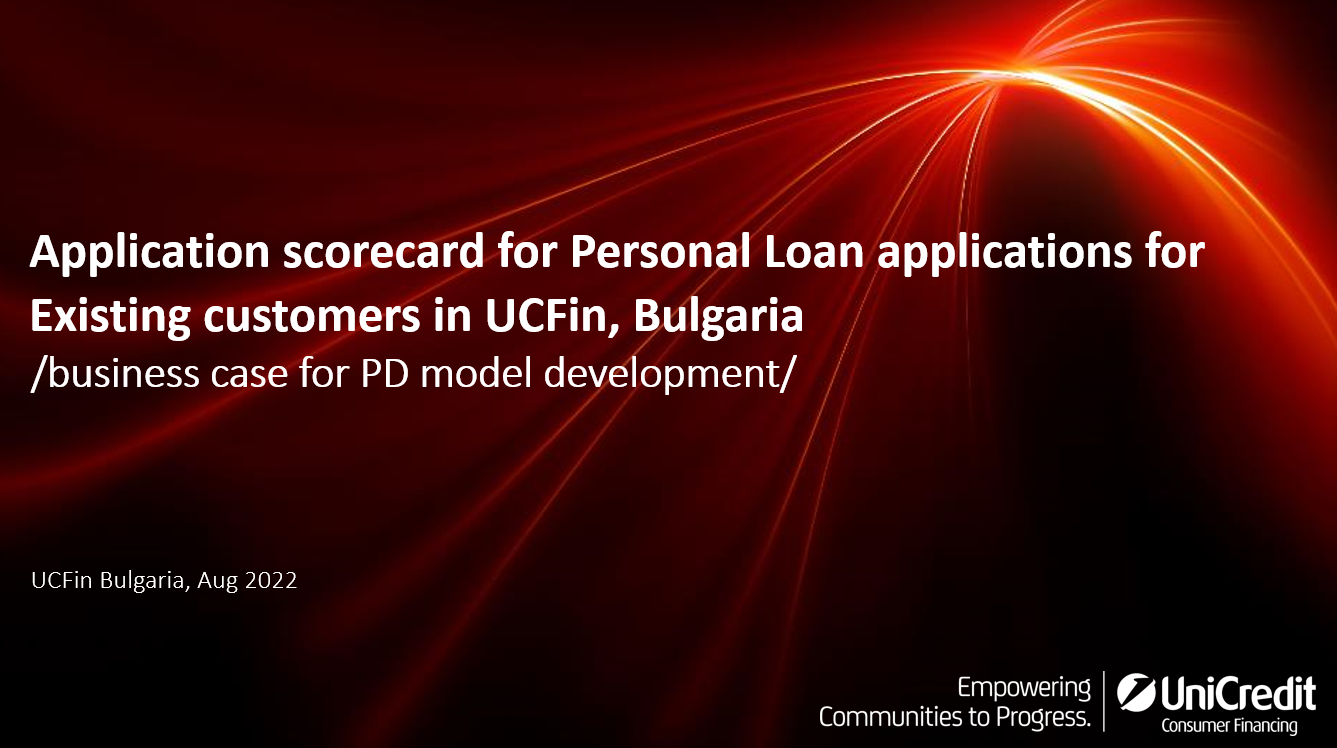
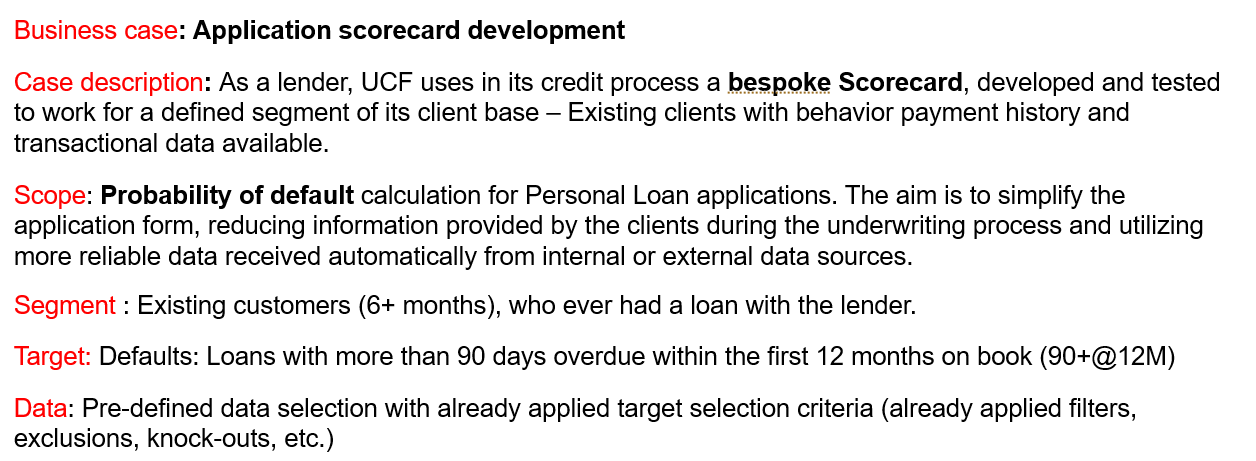
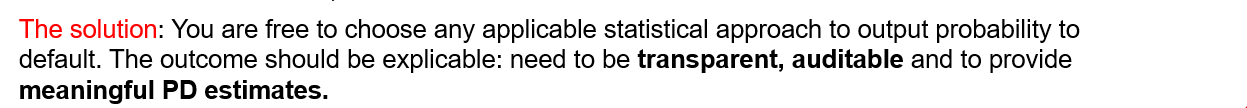













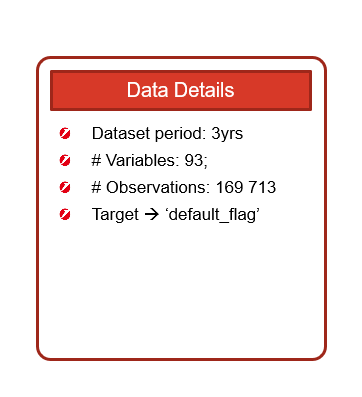

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [13]:
df = pd.read_csv('SC_data_new.csv')
df.head()

id  FIRST_MOB  default_flag  ACC_ST_A_Dt_SUM  working_months_new  POSIT_INT_INST_MIN  TRX_CH_CD_PAYMENT_ORDER_MIN3  NKP_first_cd1  not_work_months_new  average_salary_last_3months  Miscellaneous Stores_MAX12  TRX_CTRY_CD_OTH_MAX12  Government Services_MAX12  ODUE_DAYS_MAX6  NKP_Code_Curr_cd2  term_one_year_BALL         Ct_CNT  TRX_CTRY_CD_BG_Ct_MIN3  TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12  FLDLG60029  Retail Stores_MAX12  Government Services_CNT12  Retail Stores_MIN6  INT_ODUE_CNT12   NonBankCount  Automobile and Vehicles_MAX12  Clothing Stores_CNT12  Utilities_AVG12  Clothing Stores_MAX12    TBALL_TSUMA  ODUE_DAYS_MAX12  TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12  PENSII_SUM_L3M_CH  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12  UCB_bankAccountOldestOpenDate  INST_PAID_LATE_CNT12  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12  Retail Stores_SUM12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12  STAT1PROV_CNT12  LOAN_INST_COMP_MIN  Utilities_CNT12  LOAN_INST_COMP_MIN12  Miscellaneous Stores_MIN12  Automobile and Vehicles_CNT12  TRX_CTRY_CD_BG_MAX  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_MIN12  POSIT_PRINC_INST_MIN  POSIT_PRINC_INST_MIN6  CURR_CD_OTH_MIN12  POSIT_INT_INST_MIN12  BUCKET_MAX12  Date_oldest_account_UCFIN  TRX_CTRY_CD_OTH_CNT12  TRX_CTRY_CD_OTH_SUM12  TRX_CTRY_CD_OTH_MIN12  Service Providers_MIN  CURR_CD_OTH_CNT12  BALANS_3M_12M_TRND  TRX_CNT_TOT  WORST_C70_CNT12  BETS_SUM_L3M_CH  LOAN_INST_COMP_MIN6  Starting_month_curr_empl  Num_applications_L6M  Clothing Stores_MIN12  ActiveLoanCountNonBank   Dt_SUM3  Automobile and Vehicles_SUM12  POSIT_PRINC_INST_MAX  NKP_first_cd2  Utilities_MAX12  Service Providers_MIN6  Automobile and Vehicles_MIN12  ACC_ST_A_CNT12  PAYM_DAYS_AVG12  LOAN_INST_COMP_MIN3  Num_loans_L6M  Current_Unsecured_Loan_Exposure  Government Services_MIN12  TRX_CH_CD_PAYMENT_ORDER_CNT12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_SUM12  POSIT_PRINC_INST_MIN12  NKP_Code_Curr_cd1  Miscellaneous Stores_SUM12  ACC_ONE_CUST_CNT12  POSIT_PRINC_INST_MIN3  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MAX12  CURR_CD_OTH_MAX12  CNT_ACC_ONE_CUST_CH_12  TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12  TRX_CH_CD_E_CHANNEL_MIN_CH_6  Miscellaneous Stores_MIN_CH_6
0   0  8/31/2017             0        -0.261387                 240           -0.476122                      0.043286              5            -0.820406                    -0.393088               999999.000000          999999.000000              999999.000000       -0.178593                 43              999999      -0.720577                0.034674                           -0.785833   -0.490539        999999.000000                  -0.262071       999999.000000       -0.348835      -0.310337                  999999.000000              -0.339448         0.579204          999999.000000      -0.486659        -0.198939                         -0.111522                  0                              -0.072209                       0.025734             -0.058946                               0.828243            -0.443582                                 -0.301845        -0.224944           -0.126771        -0.208035             -0.006609               999999.000000                      -0.317355           -0.185051                                  999999.0             -0.195273              -0.114351      999999.000000             -0.387895      1.227829                  -0.853033              -0.246278              -0.155171          999999.000000          999999.000000          -0.237702                 0.4    -0.645796         0.517829                0             0.020444                 -0.619285             -0.609374          999999.000000                       2 -0.325401                      -0.228114             -0.167285             51    999999.000000                0.066475                  999999.000000       -0.673567        -0.128561            -0.019552      -0.571131                            10000              999999.000000                      -0.132460                                 -0.105373               -0.0825

In [14]:
# Database column types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169713 entries, 0 to 169712
Data columns (total 93 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   id                                        169713 non-null  int64  
 1   FIRST_MOB                                 169713 non-null  object 
 2   default_flag                              169713 non-null  int64  
 3   ACC_ST_A_Dt_SUM                           169713 non-null  float64
 4   working_months_new                        169713 non-null  int64  
 5   POSIT_INT_INST_MIN                        169713 non-null  float64
 6   TRX_CH_CD_PAYMENT_ORDER_MIN3              169713 non-null  float64
 7   NKP_first_cd1                             169713 non-null  int64  
 8   not_work_months_new                       169713 non-null  float64
 9   average_salary_last_3months               169713 non-null  float64
 10  Miscellaneous Stores

In [31]:
df['default_flag'].value_counts()

0    168757
1       956
Name: default_flag, dtype: int64

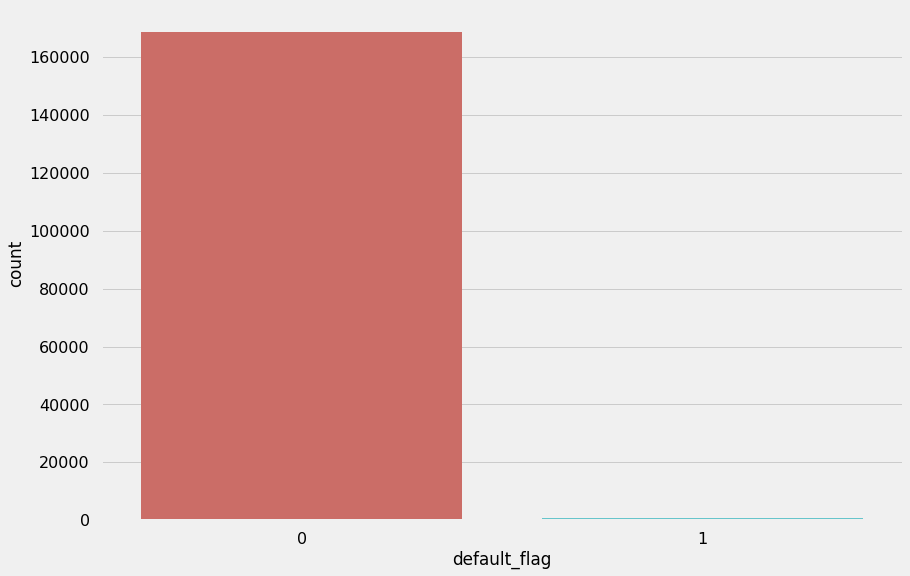

<Figure size 921.6x633.6 with 0 Axes>

In [33]:
sns.countplot(x='default_flag', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [35]:
df.groupby('default_flag').mean()

id  ACC_ST_A_Dt_SUM  working_months_new  POSIT_INT_INST_MIN  TRX_CH_CD_PAYMENT_ORDER_MIN3  NKP_first_cd1  not_work_months_new  average_salary_last_3months  Miscellaneous Stores_MAX12  TRX_CTRY_CD_OTH_MAX12  Government Services_MAX12  ODUE_DAYS_MAX6  NKP_Code_Curr_cd2  term_one_year_BALL         Ct_CNT  TRX_CTRY_CD_BG_Ct_MIN3  TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12  FLDLG60029  Retail Stores_MAX12  Government Services_CNT12  Retail Stores_MIN6  INT_ODUE_CNT12   NonBankCount  Automobile and Vehicles_MAX12  Clothing Stores_CNT12  Utilities_AVG12  Clothing Stores_MAX12    TBALL_TSUMA  ODUE_DAYS_MAX12  TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12  PENSII_SUM_L3M_CH  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12  UCB_bankAccountOldestOpenDate  INST_PAID_LATE_CNT12  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12  Retail Stores_SUM12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12  STAT1PROV_CNT12  LOAN_INST_COMP_MIN  Utilities_CNT12  LOAN_INST_COMP_MIN12  Miscellaneous Stores_MIN12  Automobile and Vehicles_CNT12  TRX_CTRY_CD_BG_MAX  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_MIN12  POSIT_PRINC_INST_MIN  POSIT_PRINC_INST_MIN6  CURR_CD_OTH_MIN12  POSIT_INT_INST_MIN12   BUCKET_MAX12  Date_oldest_account_UCFIN  TRX_CTRY_CD_OTH_CNT12  TRX_CTRY_CD_OTH_SUM12  TRX_CTRY_CD_OTH_MIN12  Service Providers_MIN  CURR_CD_OTH_CNT12  BALANS_3M_12M_TRND    TRX_CNT_TOT  WORST_C70_CNT12  BETS_SUM_L3M_CH  LOAN_INST_COMP_MIN6  Starting_month_curr_empl  Num_applications_L6M  Clothing Stores_MIN12  ActiveLoanCountNonBank      Dt_SUM3  Automobile and Vehicles_SUM12  POSIT_PRINC_INST_MAX  NKP_first_cd2  Utilities_MAX12  Service Providers_MIN6  Automobile and Vehicles_MIN12  ACC_ST_A_CNT12  PAYM_DAYS_AVG12  LOAN_INST_COMP_MIN3  Num_loans_L6M  Current_Unsecured_Loan_Exposure  Government Services_MIN12  TRX_CH_CD_PAYMENT_ORDER_CNT12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_SUM12  POSIT_PRINC_INST_MIN12  NKP_Code_Curr_cd1  Miscellaneous Stores_SUM12  ACC_ONE_CUST_CNT12  POSIT_PRINC_INST_MIN3  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MAX12  CURR_CD_OTH_MAX12  CNT_ACC_ONE_CUST_CH_12  TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12  TRX_CH_CD_E_CHANNEL_MIN_CH_6  Miscellaneous Stores_MIN_CH_6
default_flag                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [11]:
# Checking the numeric variables of the dataframes
df.describe()

id   default_flag  ACC_ST_A_Dt_SUM  working_months_new  POSIT_INT_INST_MIN  TRX_CH_CD_PAYMENT_ORDER_MIN3  NKP_first_cd1  not_work_months_new  average_salary_last_3months  Miscellaneous Stores_MAX12  TRX_CTRY_CD_OTH_MAX12  Government Services_MAX12  ODUE_DAYS_MAX6  NKP_Code_Curr_cd2  term_one_year_BALL         Ct_CNT  TRX_CTRY_CD_BG_Ct_MIN3  TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12    FLDLG60029  Retail Stores_MAX12  Government Services_CNT12  Retail Stores_MIN6  INT_ODUE_CNT12   NonBankCount  Automobile and Vehicles_MAX12  Clothing Stores_CNT12  Utilities_AVG12  Clothing Stores_MAX12    TBALL_TSUMA  ODUE_DAYS_MAX12  TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12  PENSII_SUM_L3M_CH  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12  UCB_bankAccountOldestOpenDate  INST_PAID_LATE_CNT12  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12  Retail Stores_SUM12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12  STAT1PROV_CNT12  LOAN_INST_COMP_MIN  Utilities_CNT12  LOAN_INST_COMP_MIN12  Miscellaneous Stores_MIN12  Automobile and Vehicles_CNT12  TRX_CTRY_CD_BG_MAX  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_MIN12  POSIT_PRINC_INST_MIN  POSIT_PRINC_INST_MIN6  CURR_CD_OTH_MIN12  POSIT_INT_INST_MIN12   BUCKET_MAX12  Date_oldest_account_UCFIN  TRX_CTRY_CD_OTH_CNT12  TRX_CTRY_CD_OTH_SUM12  TRX_CTRY_CD_OTH_MIN12  Service Providers_MIN  CURR_CD_OTH_CNT12  BALANS_3M_12M_TRND    TRX_CNT_TOT  WORST_C70_CNT12  BETS_SUM_L3M_CH  LOAN_INST_COMP_MIN6  Starting_month_curr_empl  Num_applications_L6M  Clothing Stores_MIN12  ActiveLoanCountNonBank        Dt_SUM3  Automobile and Vehicles_SUM12  POSIT_PRINC_INST_MAX  NKP_first_cd2  Utilities_MAX12  Service Providers_MIN6  Automobile and Vehicles_MIN12  ACC_ST_A_CNT12  PAYM_DAYS_AVG12  LOAN_INST_COMP_MIN3  Num_loans_L6M  Current_Unsecured_Loan_Exposure  Government Services_MIN12  TRX_CH_CD_PAYMENT_ORDER_CNT12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_SUM12  POSIT_PRINC_INST_MIN12  NKP_Code_Curr_cd1  Miscellaneous Stores_SUM12  ACC_ONE_CUST_CNT12  POSIT_PRINC_INST_MIN3  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MAX12  CURR_CD_OTH_MAX12  CNT_ACC_ONE_CUST_CH_12  TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12  TRX_CH_CD_E_CHANNEL_MIN_CH_6  Miscellaneous Stores_MIN_CH_6
count  169713.000000  169713.000000    169713.000000       169713.000000       169713.000000                 169713.000000  169713.000000         1.697130e+05                 1.697130e+05               169713.000000          169713.000000              169713.000000   169713.000000      169713.000000       169713.000000  169713.000000           169713.000000                        1.697130e+05  1.697130e+05        169713.000000              169713.000000       169713.000000    1.697130e+05  169713.000000                  169713.000000          169713.000000     1.697130e+05          169713.000000  169713.000000    169713.000000                     169713.000000      169713.000000                          169713.000000                  169713.000000          1.697130e+05                          169713.000000        169713.000000                             169713.000000     1.697130e+05       169713.000000    169713.000000         169713.000000               169713.000000                  169713.000000       169713.000000                             169713.000000         169713.000000          169713.000000      169713.000000         169713.000000  169713.000000              169713.000000          169713.000000          169713.000000          169713.000000          169713.000000      169713.000000       169713.000000  169713.000000     1.697130e+05    169713.000000        169713.000000              1.697130e+05          1.697130e+05          169713.000000           169713.000000  169713.000000                  169713.000000         169713.000000  169713.000000    169713.000000           169713.000000                  169713.000000   169713.000000    169713.000000        169713.000000   1.697130e+05                    169713.000000              169713.000000                  169713.000000                             169713.000000       

In [15]:
# % null value in each column
round(df.isnull().sum() / df.shape[0] * 100.00,2)

id                                          0.0
FIRST_MOB                                   0.0
default_flag                                0.0
ACC_ST_A_Dt_SUM                             0.0
working_months_new                          0.0
POSIT_INT_INST_MIN                          0.0
TRX_CH_CD_PAYMENT_ORDER_MIN3                0.0
NKP_first_cd1                               0.0
not_work_months_new                         0.0
average_salary_last_3months                 0.0
Miscellaneous Stores_MAX12                  0.0
TRX_CTRY_CD_OTH_MAX12                       0.0
Government Services_MAX12                   0.0
ODUE_DAYS_MAX6                              0.0
NKP_Code_Curr_cd2                           0.0
term_one_year_BALL                          0.0
Ct_CNT                                      0.0
TRX_CTRY_CD_BG_Ct_MIN3                      0.0
TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12          0.0
FLDLG60029                                  0.0
Retail Stores_MAX12                     

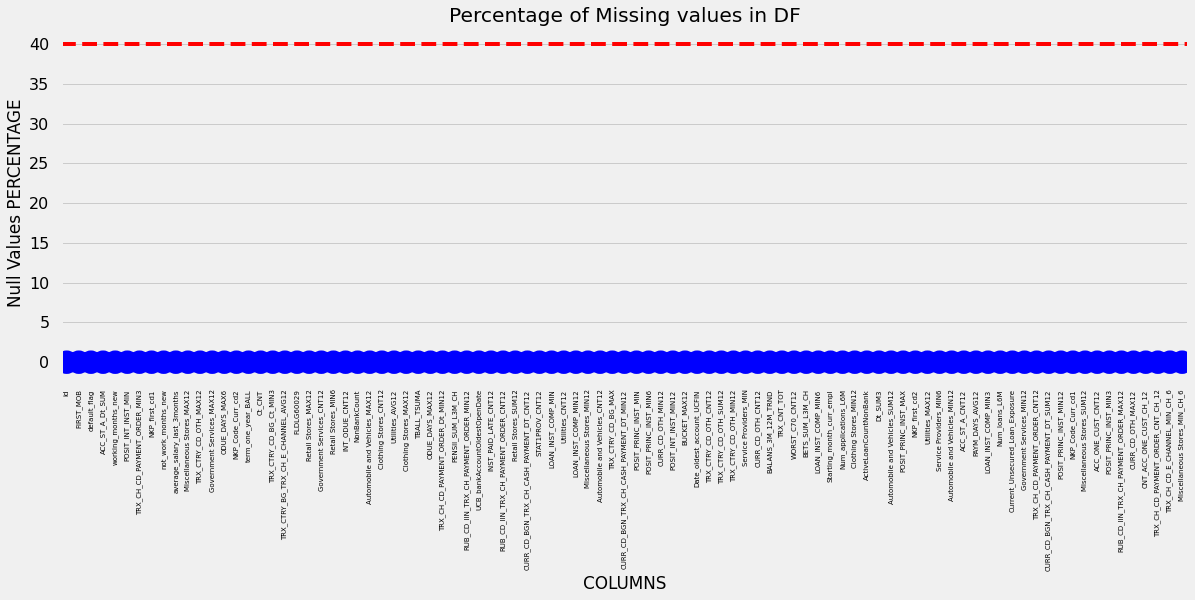

In [16]:
null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in DF")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [18]:
# more than or equal to 40% empty rows columns
nullcol_40_df = null_df[null_df["Null Values Percentage"]>=40]
nullcol_40_df

Empty DataFrame
Columns: [Column Name, Null Values Percentage]
Index: []

In [19]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_df)

0

Супер - нямаме липсващи данни! А какви данни имаме?

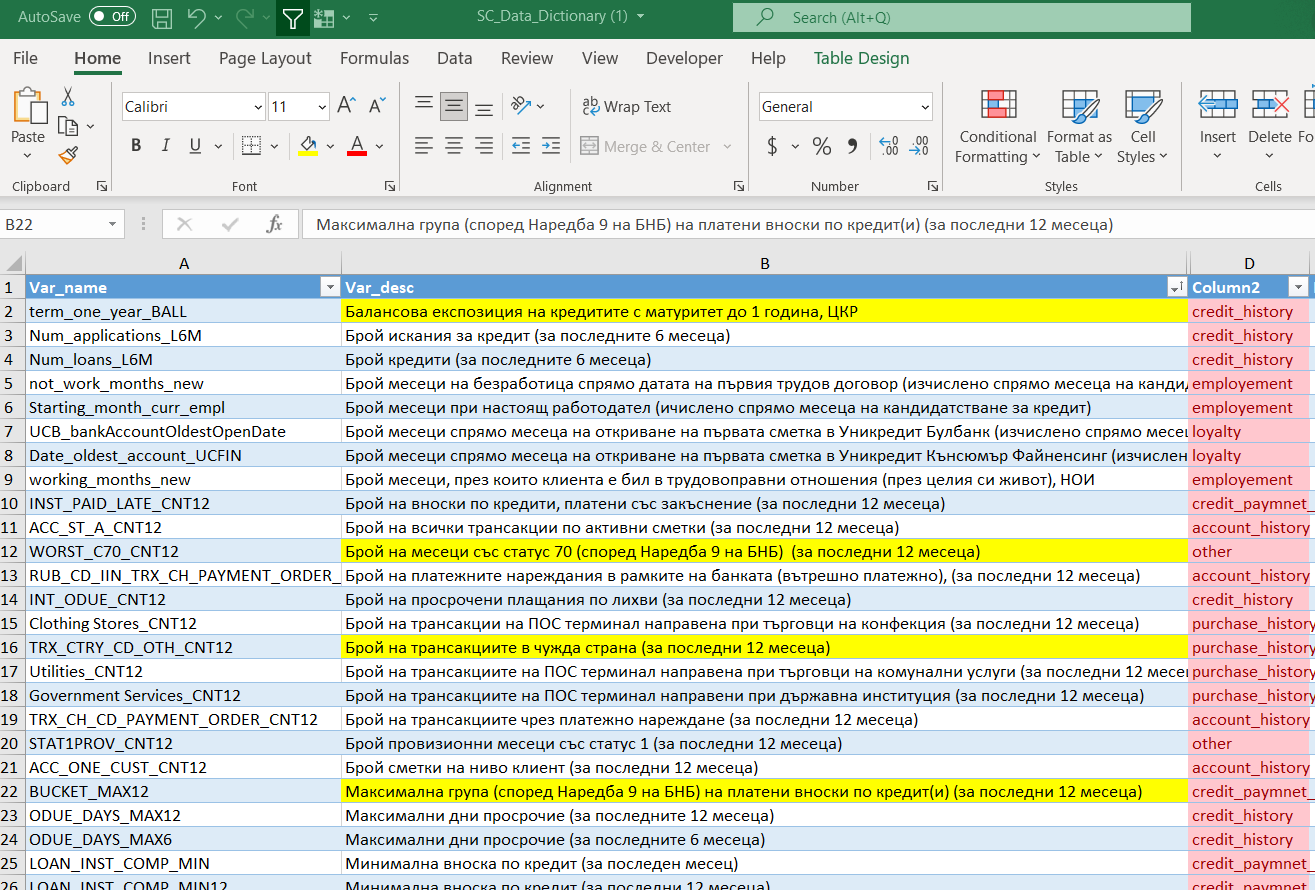

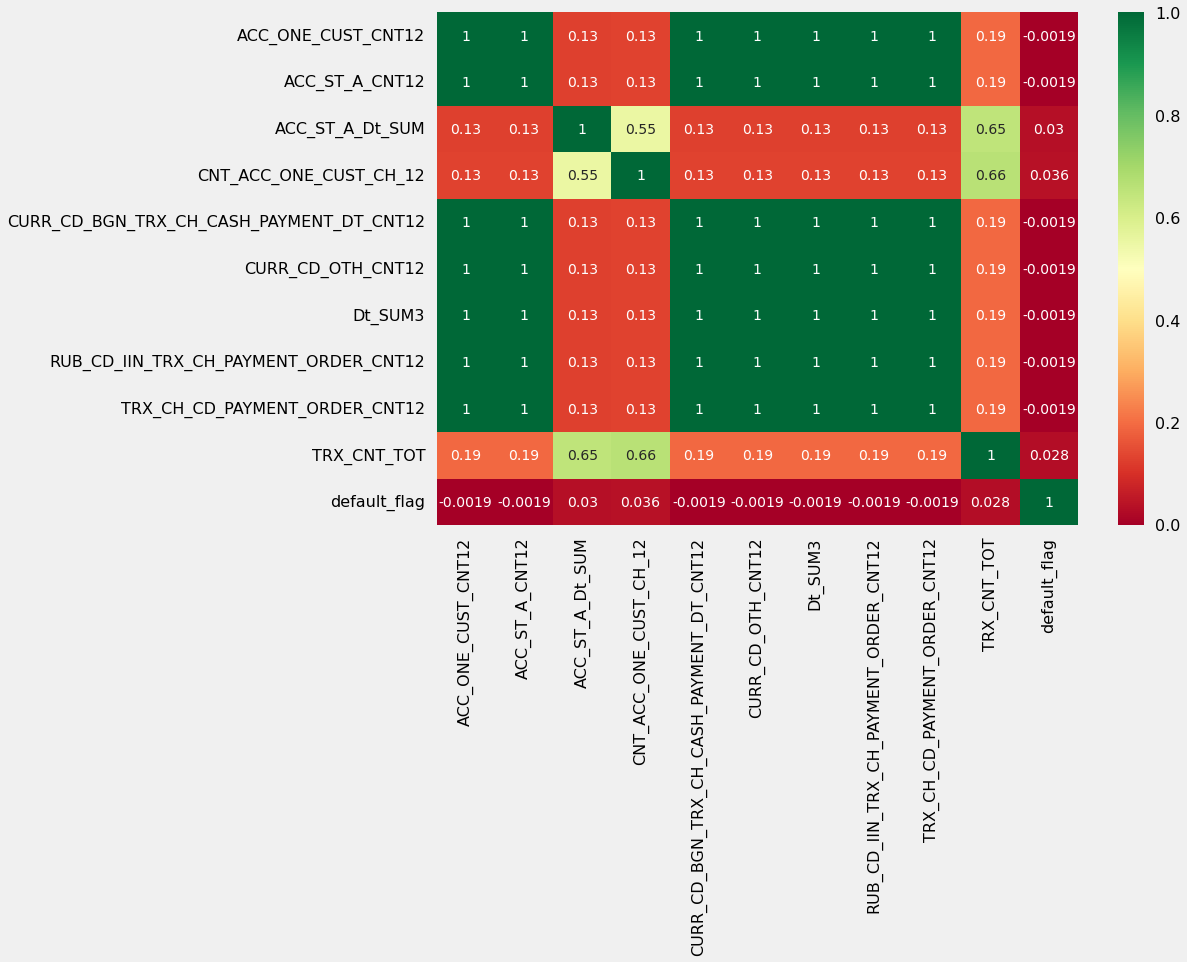

In [20]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
#Account History variables

Source = df[["ACC_ONE_CUST_CNT12", "ACC_ST_A_CNT12", "ACC_ST_A_Dt_SUM", "CNT_ACC_ONE_CUST_CH_12","CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12",
"CURR_CD_OTH_CNT12","Dt_SUM3","RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12","TRX_CH_CD_PAYMENT_ORDER_CNT12","TRX_CNT_TOT", "default_flag"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

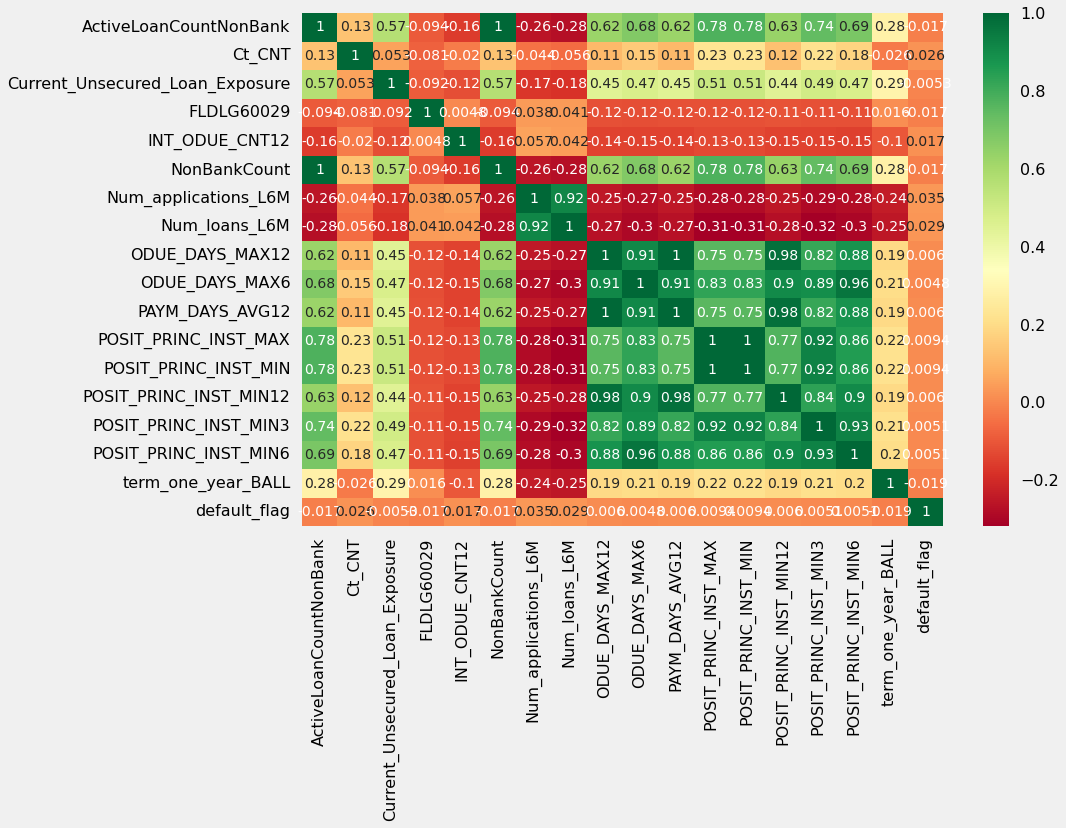

In [22]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
#Credit payment history variables

Source = df[["ActiveLoanCountNonBank", 
"Ct_CNT", 
"Current_Unsecured_Loan_Exposure", 
"FLDLG60029",
"INT_ODUE_CNT12", 
"NonBankCount",
"Num_applications_L6M", 
"Num_loans_L6M", 
"ODUE_DAYS_MAX12", 
"ODUE_DAYS_MAX6", 
"PAYM_DAYS_AVG12", 
"POSIT_PRINC_INST_MAX", 
"POSIT_PRINC_INST_MIN", 
"POSIT_PRINC_INST_MIN12", 
"POSIT_PRINC_INST_MIN3", 
"POSIT_PRINC_INST_MIN6", 
"term_one_year_BALL", "default_flag"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

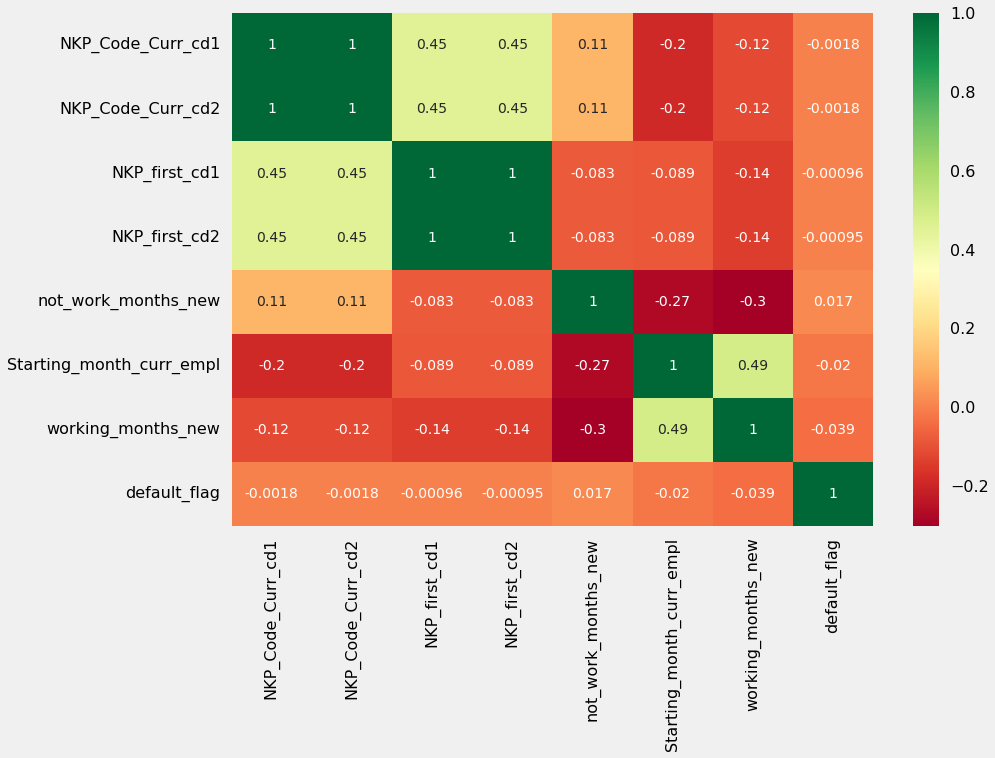

In [26]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
# Employment variables

Source = df[["NKP_Code_Curr_cd1", 
"NKP_Code_Curr_cd2", 
"NKP_first_cd1", 
"NKP_first_cd2", 
"not_work_months_new", 
"Starting_month_curr_empl", 
"working_months_new", "default_flag"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

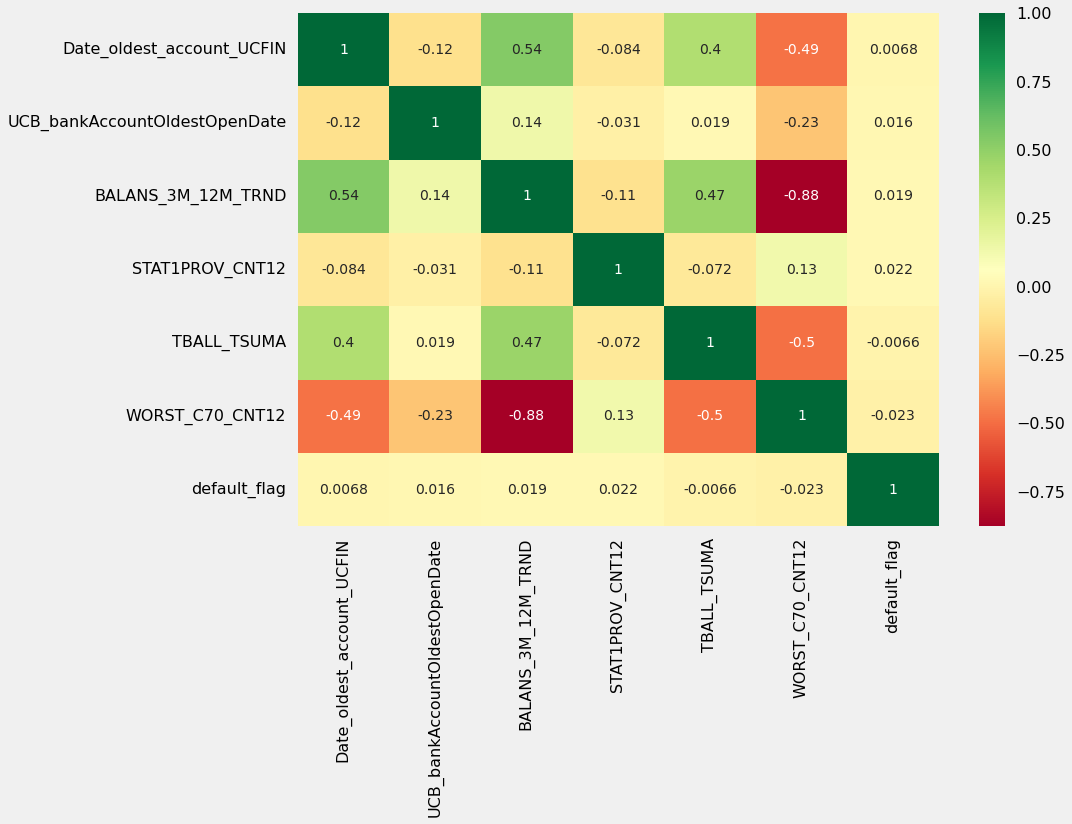

In [27]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
#Other data with not significant correlation

Source = df[["Date_oldest_account_UCFIN", 
"UCB_bankAccountOldestOpenDate", 
"BALANS_3M_12M_TRND",
"FIRST_MOB",
"STAT1PROV_CNT12",
"TBALL_TSUMA",
"WORST_C70_CNT12", "default_flag"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

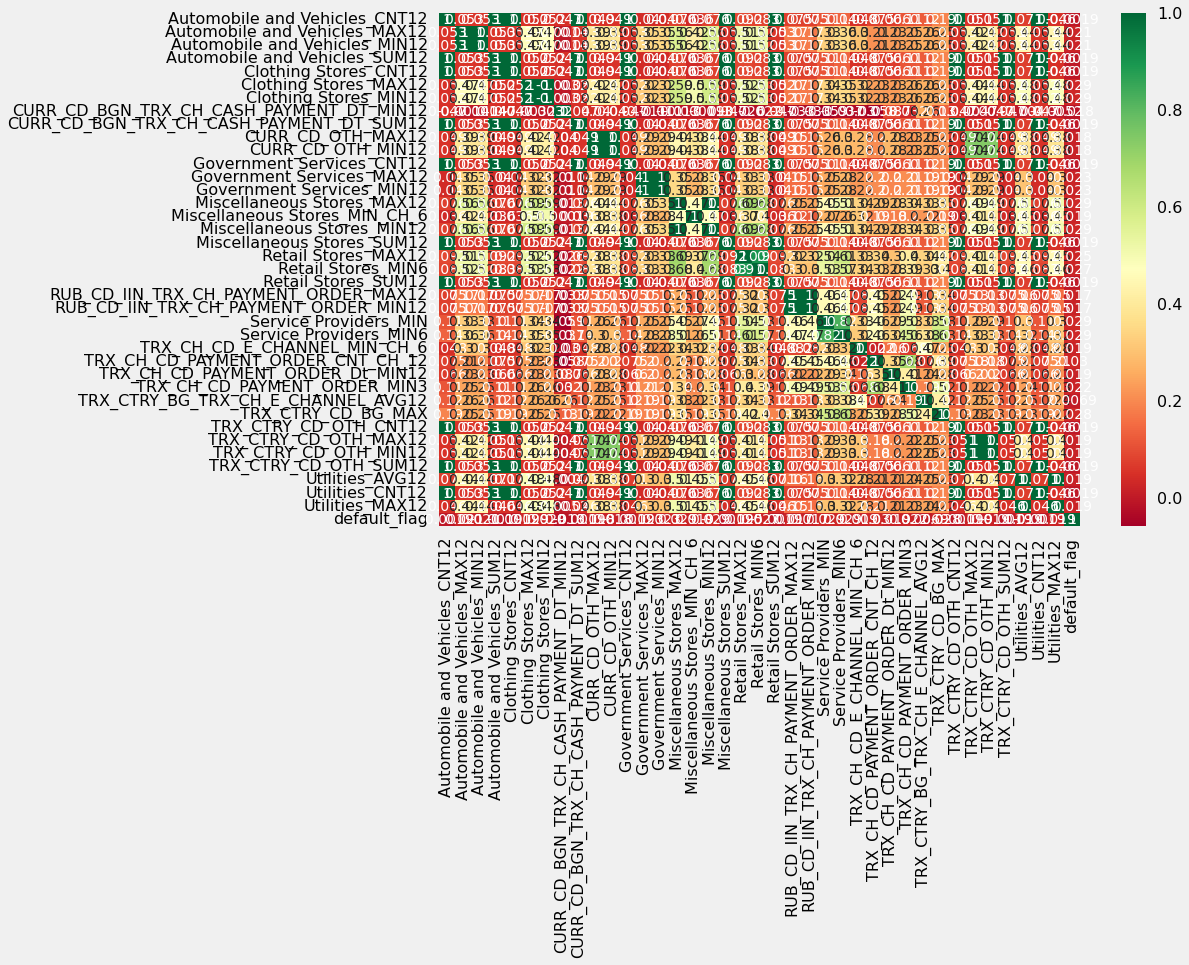

In [28]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
# Purschasing history variables 

Source = df[["Automobile and Vehicles_CNT12", 
"Automobile and Vehicles_MAX12",
"Automobile and Vehicles_MIN12",
"Automobile and Vehicles_SUM12",
"Clothing Stores_CNT12",
"Clothing Stores_MAX12",
"Clothing Stores_MIN12",
"CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_MIN12",
"CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_SUM12",
"CURR_CD_OTH_MAX12",
"CURR_CD_OTH_MIN12",
"Government Services_CNT12",
"Government Services_MAX12",
"Government Services_MIN12",
"Miscellaneous Stores_MAX12",
"Miscellaneous Stores_MIN_CH_6",
"Miscellaneous Stores_MIN12",
"Miscellaneous Stores_SUM12",
"Retail Stores_MAX12",
"Retail Stores_MIN6",
"Retail Stores_SUM12",
"RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MAX12",
"RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12",
"Service Providers_MIN",
"Service Providers_MIN6",
"TRX_CH_CD_E_CHANNEL_MIN_CH_6",
"TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12",
"TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12",
"TRX_CH_CD_PAYMENT_ORDER_MIN3",
"TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12",
"TRX_CTRY_CD_BG_MAX",
"TRX_CTRY_CD_OTH_CNT12",
"TRX_CTRY_CD_OTH_MAX12",
"TRX_CTRY_CD_OTH_MIN12",
"TRX_CTRY_CD_OTH_SUM12",
"Utilities_AVG12",
"Utilities_CNT12", 
"Utilities_MAX12", "default_flag"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

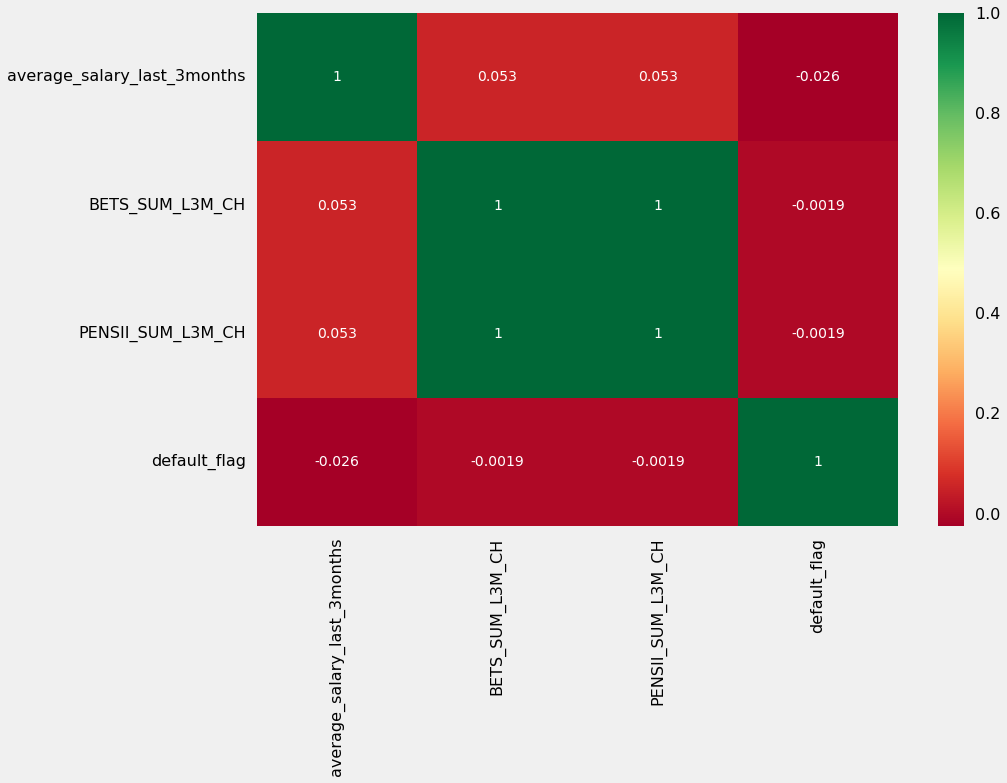

In [30]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
#other data
Source = df[["average_salary_last_3months",
"BETS_SUM_L3M_CH", 
"PENSII_SUM_L3M_CH", "default_flag"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

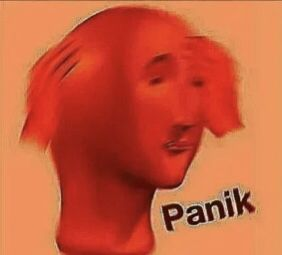

Следва урок в excel номер 1: enable Data Analysis and prodicing Histrograms and binning за 93 променливи

excel file not saved...

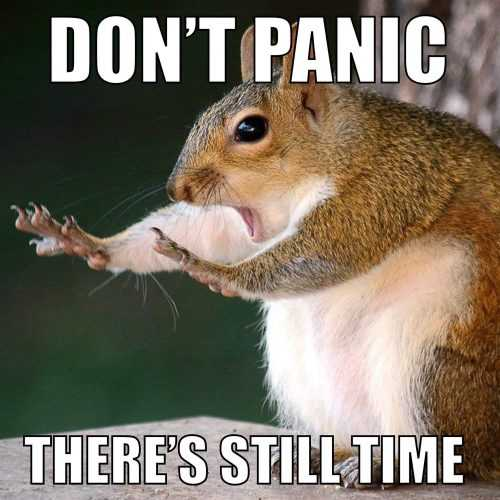

Starting all over again..

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt


data=pd.read_csv('SC_data_new.csv', header=0)

print(data.shape)
print(list(data.columns))

(169713, 93)
['id', 'FIRST_MOB', 'default_flag', 'ACC_ST_A_Dt_SUM', 'working_months_new', 'POSIT_INT_INST_MIN', 'TRX_CH_CD_PAYMENT_ORDER_MIN3', 'NKP_first_cd1', 'not_work_months_new', 'average_salary_last_3months', 'Miscellaneous Stores_MAX12', 'TRX_CTRY_CD_OTH_MAX12', 'Government Services_MAX12', 'ODUE_DAYS_MAX6', 'NKP_Code_Curr_cd2', 'term_one_year_BALL', 'Ct_CNT', 'TRX_CTRY_CD_BG_Ct_MIN3', 'TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12', 'FLDLG60029', 'Retail Stores_MAX12', 'Government Services_CNT12', 'Retail Stores_MIN6', 'INT_ODUE_CNT12', 'NonBankCount', 'Automobile and Vehicles_MAX12', 'Clothing Stores_CNT12', 'Utilities_AVG12', 'Clothing Stores_MAX12', 'TBALL_TSUMA', 'ODUE_DAYS_MAX12', 'TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12', 'PENSII_SUM_L3M_CH', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12', 'UCB_bankAccountOldestOpenDate', 'INST_PAID_LATE_CNT12', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12', 'Retail Stores_SUM12', 'CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12', 'STAT1PROV_CNT12', 'LOAN_INST_COMP_MIN', 'Uti

In [37]:
x_simple = data
my_r = x_simple.corr(method="spearman")
print(my_r)

                                                id  default_flag  ACC_ST_A_Dt_SUM  working_months_new  POSIT_INT_INST_MIN  TRX_CH_CD_PAYMENT_ORDER_MIN3  NKP_first_cd1  not_work_months_new  average_salary_last_3months  Miscellaneous Stores_MAX12  TRX_CTRY_CD_OTH_MAX12  Government Services_MAX12  ODUE_DAYS_MAX6  NKP_Code_Curr_cd2  term_one_year_BALL    Ct_CNT  TRX_CTRY_CD_BG_Ct_MIN3  TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12  FLDLG60029  Retail Stores_MAX12  Government Services_CNT12  Retail Stores_MIN6  INT_ODUE_CNT12  NonBankCount  Automobile and Vehicles_MAX12  Clothing Stores_CNT12  Utilities_AVG12  Clothing Stores_MAX12  TBALL_TSUMA  ODUE_DAYS_MAX12  TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12  PENSII_SUM_L3M_CH  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12  UCB_bankAccountOldestOpenDate  INST_PAID_LATE_CNT12  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12  Retail Stores_SUM12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12  STAT1PROV_CNT12  LOAN_INST_COMP_MIN  Utilities_CNT12  LOAN_INST_COMP_MIN12  Miscellaneous Stores_M

In [38]:
my_r.to_csv("spearman2.csv")

In [39]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(20,20))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

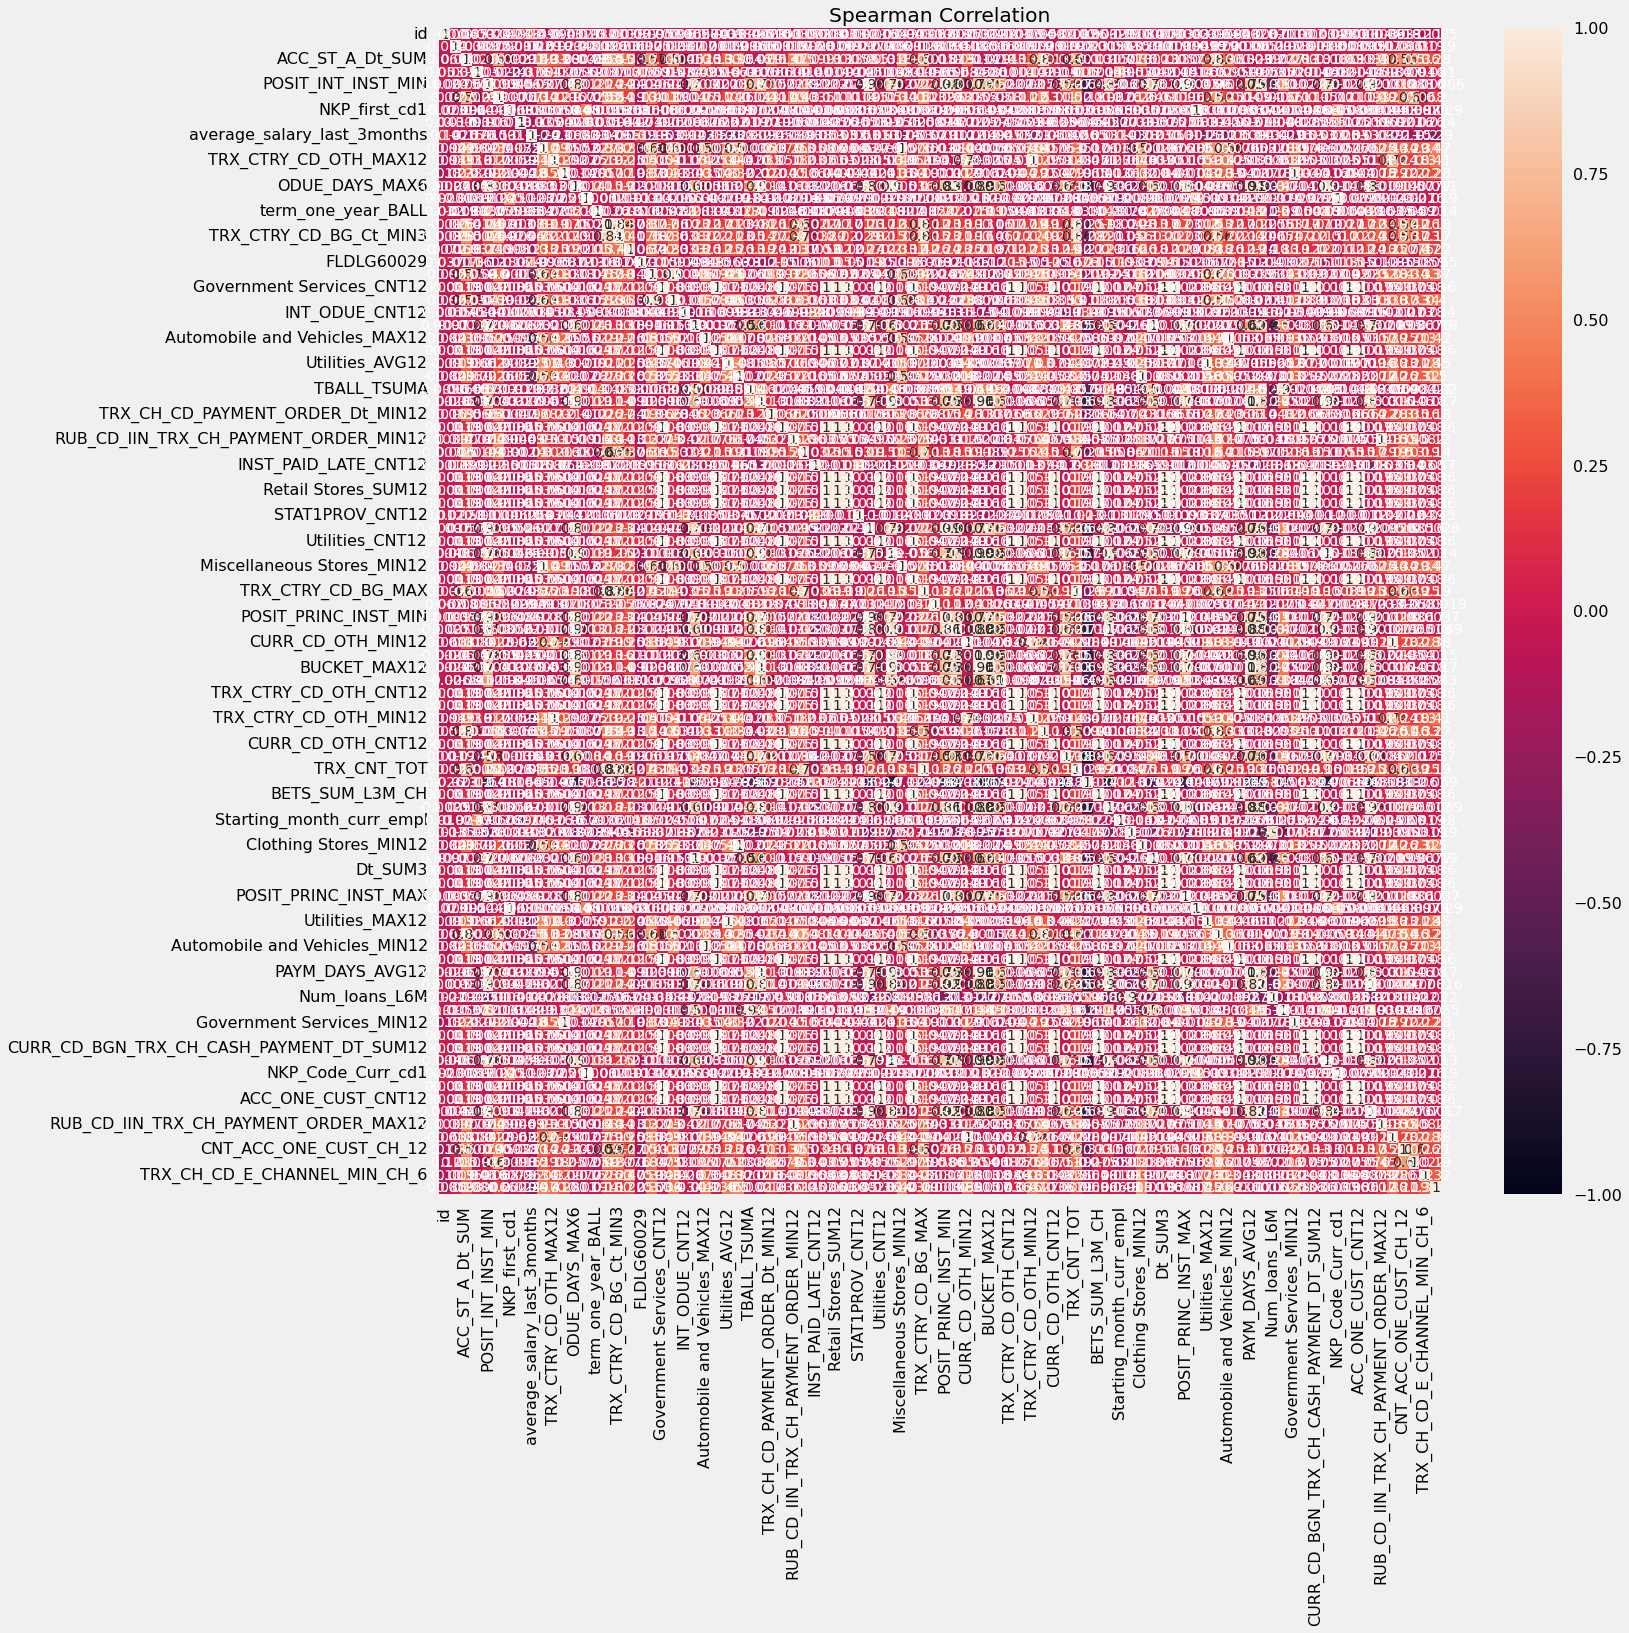

In [40]:
r_simple=display_correlation(x_simple)

In [41]:
example1_simple = data
my_r2 = example1_simple.corr(method="pearson")
print(my_r2)

                                                id  default_flag  ACC_ST_A_Dt_SUM  working_months_new  POSIT_INT_INST_MIN  TRX_CH_CD_PAYMENT_ORDER_MIN3  NKP_first_cd1  not_work_months_new  average_salary_last_3months  Miscellaneous Stores_MAX12  TRX_CTRY_CD_OTH_MAX12  Government Services_MAX12  ODUE_DAYS_MAX6  NKP_Code_Curr_cd2  term_one_year_BALL    Ct_CNT  TRX_CTRY_CD_BG_Ct_MIN3  TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12  FLDLG60029  Retail Stores_MAX12  Government Services_CNT12  Retail Stores_MIN6  INT_ODUE_CNT12  NonBankCount  Automobile and Vehicles_MAX12  Clothing Stores_CNT12  Utilities_AVG12  Clothing Stores_MAX12  TBALL_TSUMA  ODUE_DAYS_MAX12  TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12  PENSII_SUM_L3M_CH  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12  UCB_bankAccountOldestOpenDate  INST_PAID_LATE_CNT12  RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12  Retail Stores_SUM12  CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12  STAT1PROV_CNT12  LOAN_INST_COMP_MIN  Utilities_CNT12  LOAN_INST_COMP_MIN12  Miscellaneous Stores_M

In [42]:
my_r2.to_csv("pearson.csv")

In [43]:
my_data=pd.read_csv('SC_data_3.csv', header=0)
print(data.shape)
print(list(data.columns))

(169713, 93)
['id', 'FIRST_MOB', 'default_flag', 'ACC_ST_A_Dt_SUM', 'working_months_new', 'POSIT_INT_INST_MIN', 'TRX_CH_CD_PAYMENT_ORDER_MIN3', 'NKP_first_cd1', 'not_work_months_new', 'average_salary_last_3months', 'Miscellaneous Stores_MAX12', 'TRX_CTRY_CD_OTH_MAX12', 'Government Services_MAX12', 'ODUE_DAYS_MAX6', 'NKP_Code_Curr_cd2', 'term_one_year_BALL', 'Ct_CNT', 'TRX_CTRY_CD_BG_Ct_MIN3', 'TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12', 'FLDLG60029', 'Retail Stores_MAX12', 'Government Services_CNT12', 'Retail Stores_MIN6', 'INT_ODUE_CNT12', 'NonBankCount', 'Automobile and Vehicles_MAX12', 'Clothing Stores_CNT12', 'Utilities_AVG12', 'Clothing Stores_MAX12', 'TBALL_TSUMA', 'ODUE_DAYS_MAX12', 'TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12', 'PENSII_SUM_L3M_CH', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12', 'UCB_bankAccountOldestOpenDate', 'INST_PAID_LATE_CNT12', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12', 'Retail Stores_SUM12', 'CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12', 'STAT1PROV_CNT12', 'LOAN_INST_COMP_MIN', 'Uti

In [44]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in my_data.columns if my_data[c].dtype in numerics]:
    my_data[c] = np.log10(my_data[c])

Сещаме се, че след анонимизирането половината ни дата е в ортицателни стойности и не можем да я логаритмуваме..

Междувремнно, някой ни напомня, че:

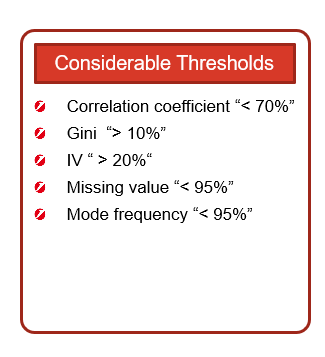

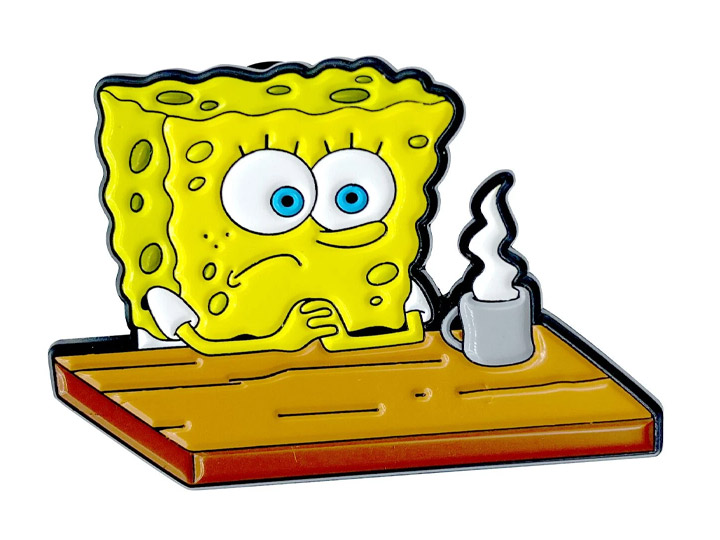
EXISTANTIAL CRISIS N1